# Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# Data Load

In [ ]:
PATH = "/content/drive/MyDrive/KUBIG_WinterPR"

In [ ]:
df = pd.read_csv(PATH + '/data.csv', encoding='cp949')

In [ ]:
df.head()

위치       시장         매출  면적 (m^2)  총 점포수  종사자 수  화장실  주차시설  유동20대  유동30대  \
0  종로구     광장시장    6189155     33080   2040   3625    1     1   3217   3868   
1  종로구  동대문종합시장  988480074     19889   5750  17650    1     1   1116   1399   
2  종로구     통인시장  314622751      3074     85    133    1     0    127    215   
3  종로구     동묘시장  329871005      7709    700    785    0     0     45     62   
4   중구    남대문시장  297641410     24466   5400   6853    1     0   1594   2296   

   ...  버스 정류장 수  역세권 여부  관광 특구 여부  인스타그램 해시태그 수  카카오맵 리뷰 수  네이버 지도 리뷰 수  \
0  ...         3       1         0       1160000       1958           56   
1  ...         1       1         0        185000        143          837   
2  ...         1       0         1         68000        210          562   
3  ...         0       1         0        356000         22           51   
4  ...         4       1         0        117000        313          403   

   네이버 블로그  구글맵 관심도  카카오맵 관심도  네이버리뷰 관심도  
0     7429   158193      2075        116  
1     4176     8786       237       3178  
2     2913    26722       224        206  
3     2395    18600       227        219  
4     3363   108486       634       1678  

[5 rows x 38 columns]

In [ ]:
# 시장위치 더미변수 추가
## removing original feature
df_dummy = pd.concat([df.iloc[:,1:], pd.get_dummies(df['위치'])], axis = 1)
df_dummy.head()

시장         매출  면적 (m^2)  총 점포수  종사자 수  화장실  주차시설  유동20대  유동30대  유동40대  \
0     광장시장    6189155     33080   2040   3625    1     1   3217   3868   5048   
1  동대문종합시장  988480074     19889   5750  17650    1     1   1116   1399   1861   
2     통인시장  314622751      3074     85    133    1     0    127    215    257   
3     동묘시장  329871005      7709    700    785    0     0     45     62     76   
4    남대문시장  297641410     24466   5400   6853    1     0   1594   2296   3207   

   ...  구로구  금천구  동대문구  동작구  마포구  성북구  송파구  용산구  종로구  중구  
0  ...    0    0     0    0    0    0    0    0    1   0  
1  ...    0    0     0    0    0    0    0    0    1   0  
2  ...    0    0     0    0    0    0    0    0    1   0  
3  ...    0    0     0    0    0    0    0    0    1   0  
4  ...    0    0     0    0    0    0    0    0    0   1  

[5 rows x 50 columns]

In [ ]:
# 시장 제외
market = df_dummy['시장']
dff = df_dummy.iloc[:,1:]

In [ ]:
dff.head()

매출  면적 (m^2)  총 점포수  종사자 수  화장실  주차시설  유동20대  유동30대  유동40대  유동50대  \
0    6189155     33080   2040   3625    1     1   3217   3868   5048   5400   
1  988480074     19889   5750  17650    1     1   1116   1399   1861   1999   
2  314622751      3074     85    133    1     0    127    215    257    290   
3  329871005      7709    700    785    0     0     45     62     76     95   
4  297641410     24466   5400   6853    1     0   1594   2296   3207   3397   

   ...  구로구  금천구  동대문구  동작구  마포구  성북구  송파구  용산구  종로구  중구  
0  ...    0    0     0    0    0    0    0    0    1   0  
1  ...    0    0     0    0    0    0    0    0    1   0  
2  ...    0    0     0    0    0    0    0    0    1   0  
3  ...    0    0     0    0    0    0    0    0    1   0  
4  ...    0    0     0    0    0    0    0    0    0   1  

[5 rows x 49 columns]

In [ ]:
dff.shape

(30, 49)

# Scaling/Log transformation

## MinMax Normalization

In [ ]:
# MinMaxScaler로 정규화
##
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
dff_minmax = pd.DataFrame(scale.fit_transform(dff))

In [ ]:
dff_minmax.columns = dff.columns

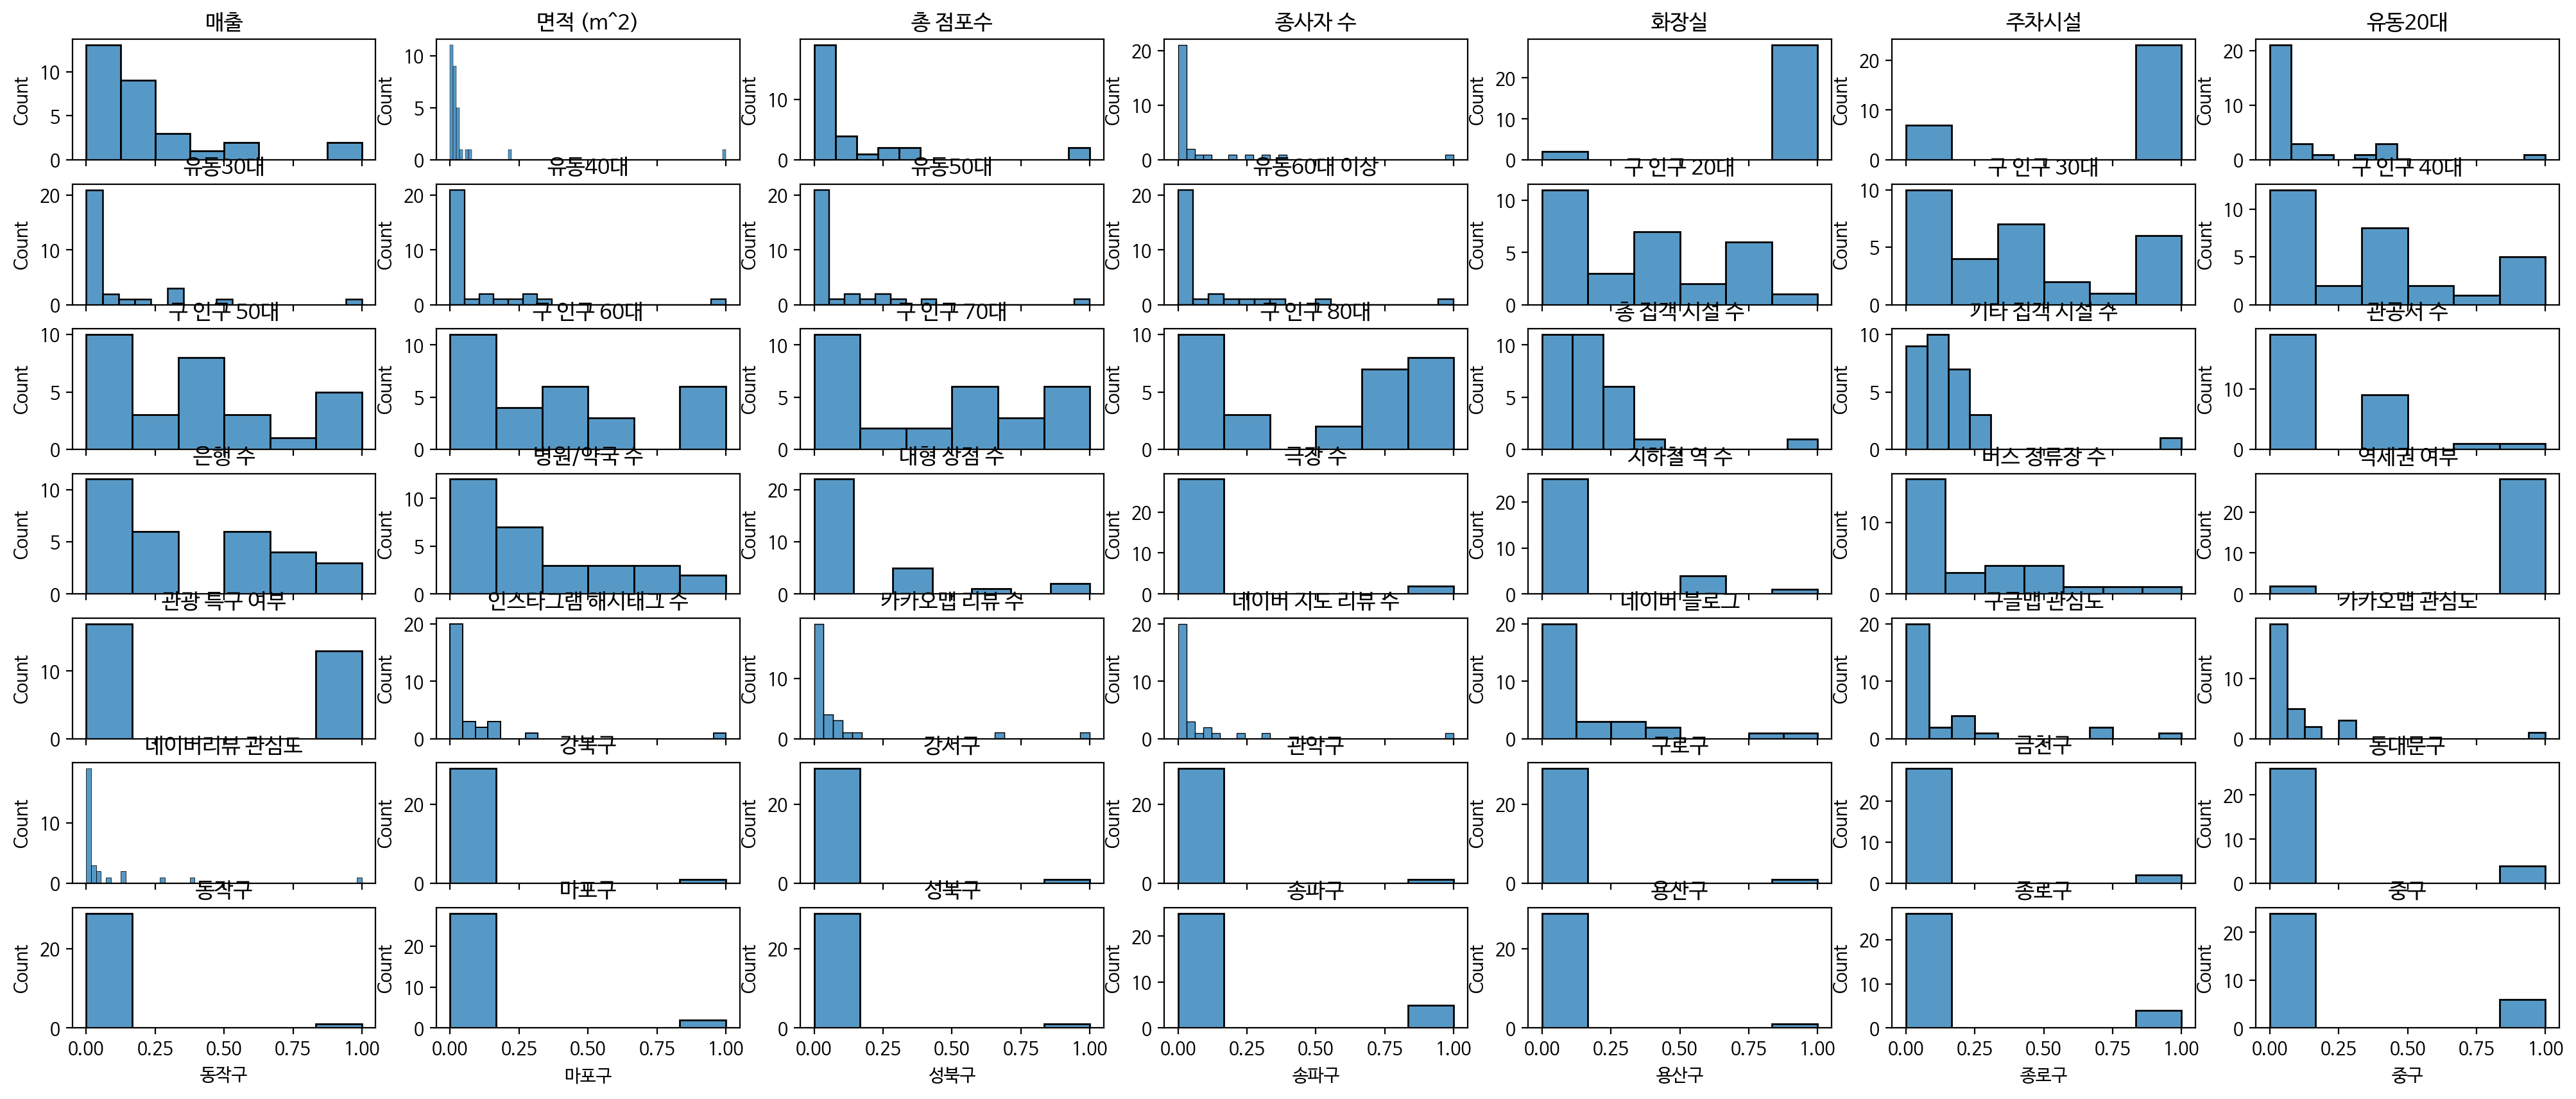

In [ ]:
fig, axes = plt.subplots(7, 7, sharex=True, figsize=(25,10))

x = 0
for i, col in enumerate(dff_minmax):
    sns.histplot(dff_minmax[col], ax = axes[x,i%7])
    axes[x, i%7].set_title(col)
    if (i+1)%7 == 0: x += 1

## Log Transformation
- 이상치를 피해 정규분포화 해주기 위함
- inf값을 피하기 위해 log(x+1)로 transformation

In [ ]:
# Log transformation -> avoid inf log(x+1)
dff_log = np.log(dff+1)
dff_log.head()

매출   면적 (m^2)     총 점포수     종사자 수       화장실      주차시설     유동20대  \
0  15.638309  10.406714  7.621195  8.195885  0.693147  0.693147  8.076515   
1  20.711679   9.897972  8.657129  9.778548  0.693147  0.693147  7.018402   
2  19.566885   8.031060  4.454347  4.897840  0.693147  0.000000  4.852030   
3  19.614212   8.950273  6.552508  6.666957  0.000000  0.000000  3.828641   
4  19.511400  10.105081  8.594339  8.832588  0.693147  0.000000  7.374629   

      유동30대     유동40대     유동50대  ...  구로구  금천구  동대문구  동작구  마포구  성북구  송파구  용산구  \
0  8.260751  8.526945  8.594339  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
1  7.244228  7.529406  7.600902  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
2  5.375278  5.552960  5.673323  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
3  4.143135  4.343805  4.564348  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
4  7.739359  8.073403  8.130942  ...  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   

        종로구        중구  
0  0.693359  0.000000  
1  0.693359  0.000000  
2  0.693359  0.000000  
3  0.693359  0.000000  
4  0.000000  0.693359  

[5 rows x 49 columns]

## Log transformation + MinMax Normalization

In [ ]:
# MinMaxScaler로 정규화
## Log transformation 이후 MinMax Normalization
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
dff_log_minmax = pd.DataFrame(scale.fit_transform(dff_log))

In [ ]:
dff_log_minmax.columns = dff.columns

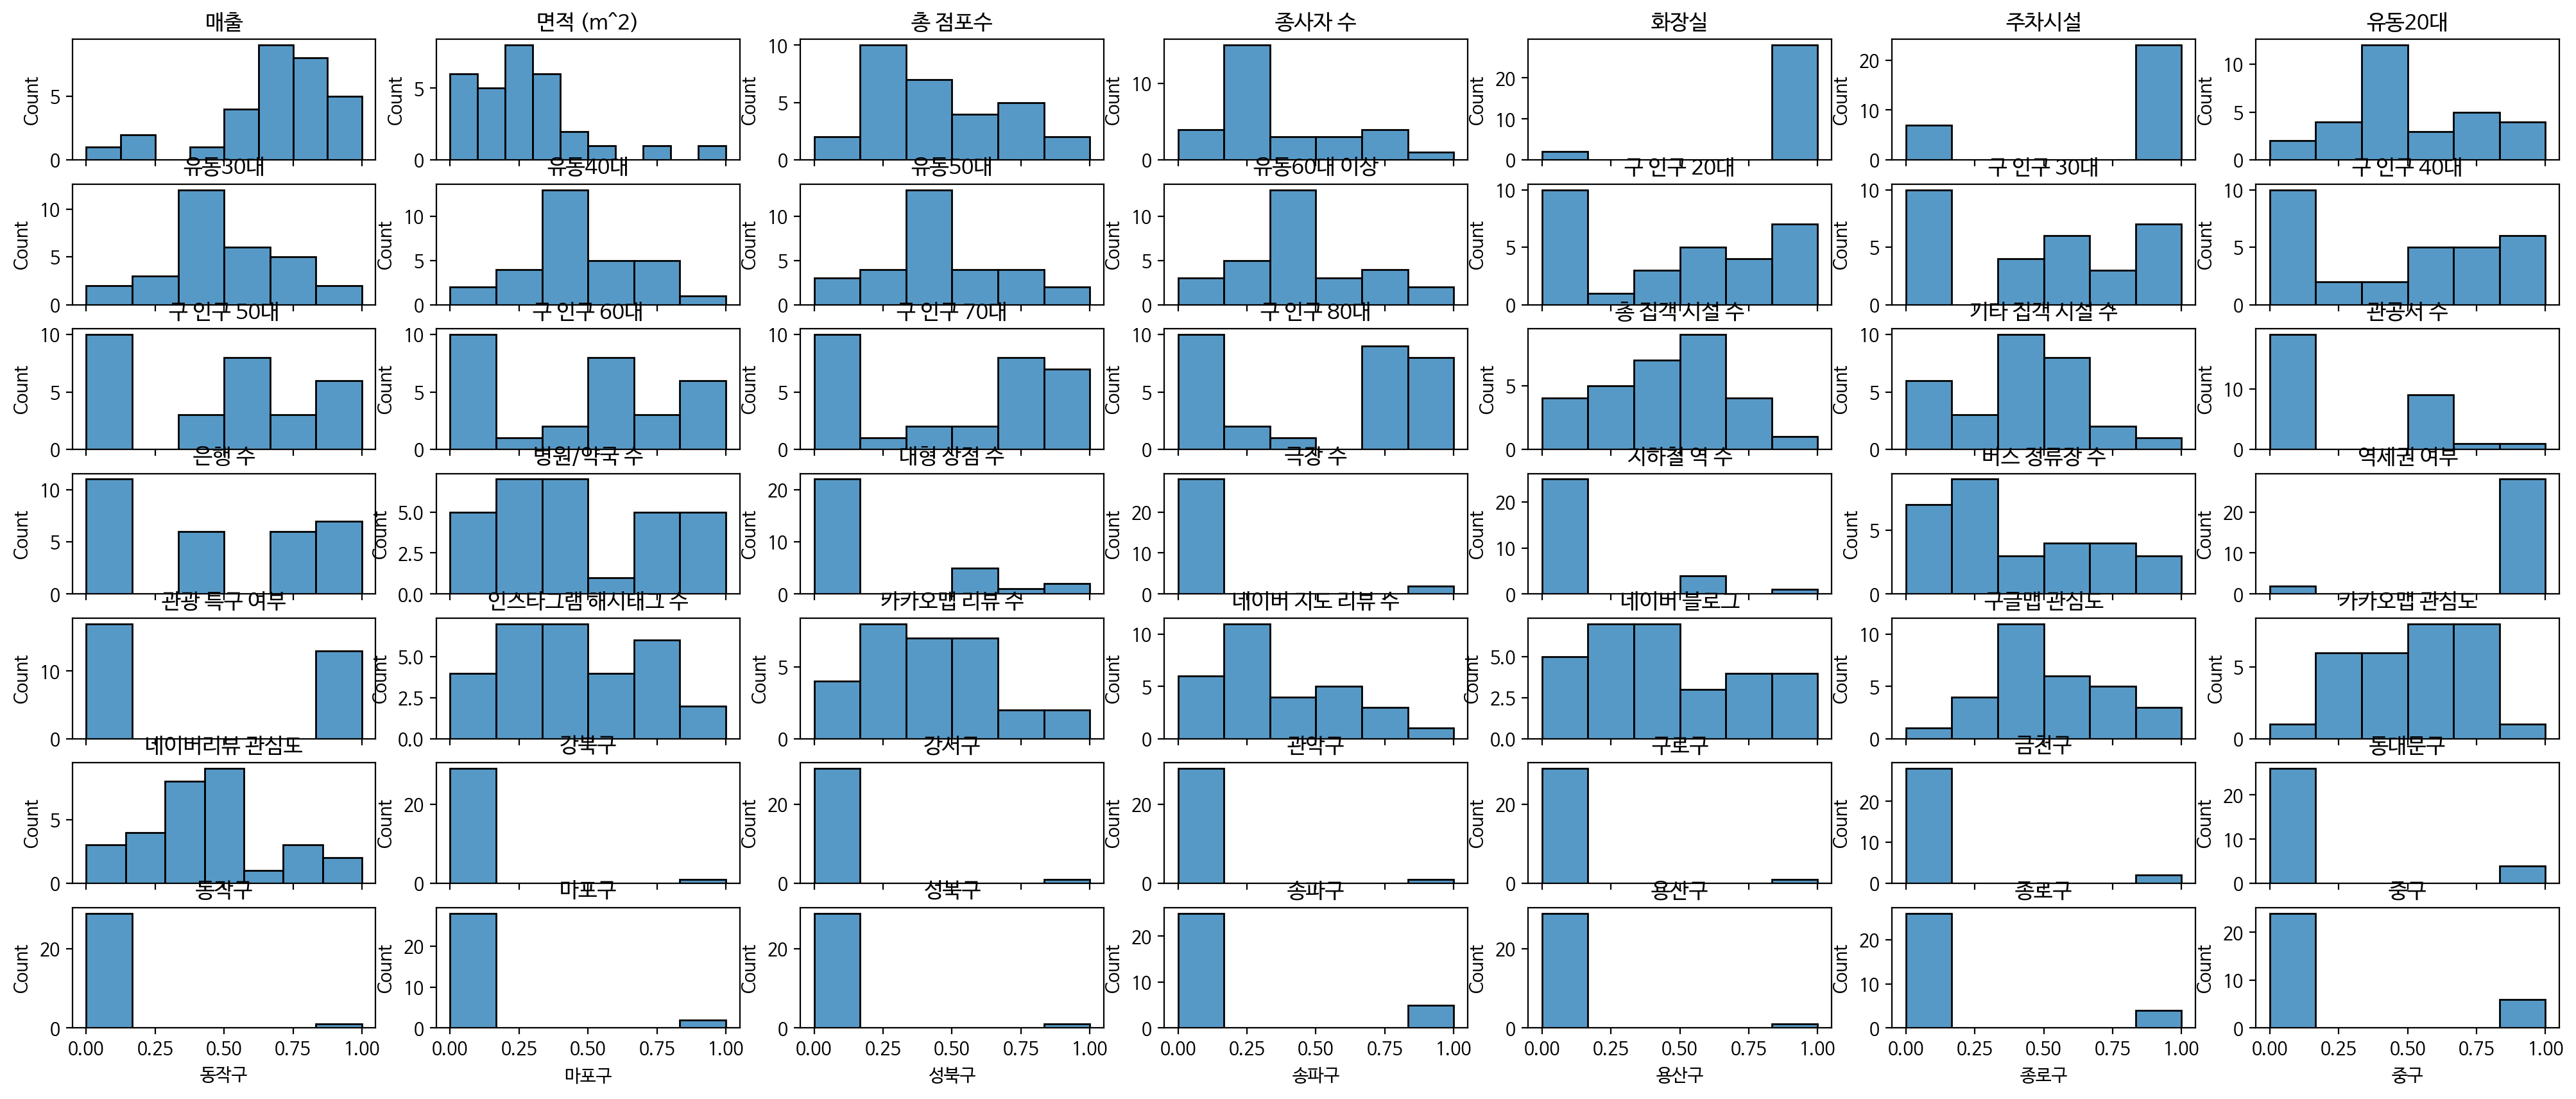

In [ ]:
fig, axes = plt.subplots(7, 7, sharex=True, figsize=(25,10))

x = 0
for i, col in enumerate(dff_log_minmax):
    sns.histplot(dff_log_minmax[col], ax = axes[x,i%7])
    axes[x, i%7].set_title(col)
    if (i+1)%7 == 0: x += 1

## Log transformation + Standardization

In [ ]:
## Log transformation-> Standardization
## 전체적으로 정규분포를 따르진 않는 데이터지만, 이상치가 큰 값들의 영향이 있기 때문에 log->z값 사용
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
dff_log_scale = pd.DataFrame(scale.fit_transform(dff_log))
dff_log_scale.columns = dff.columns

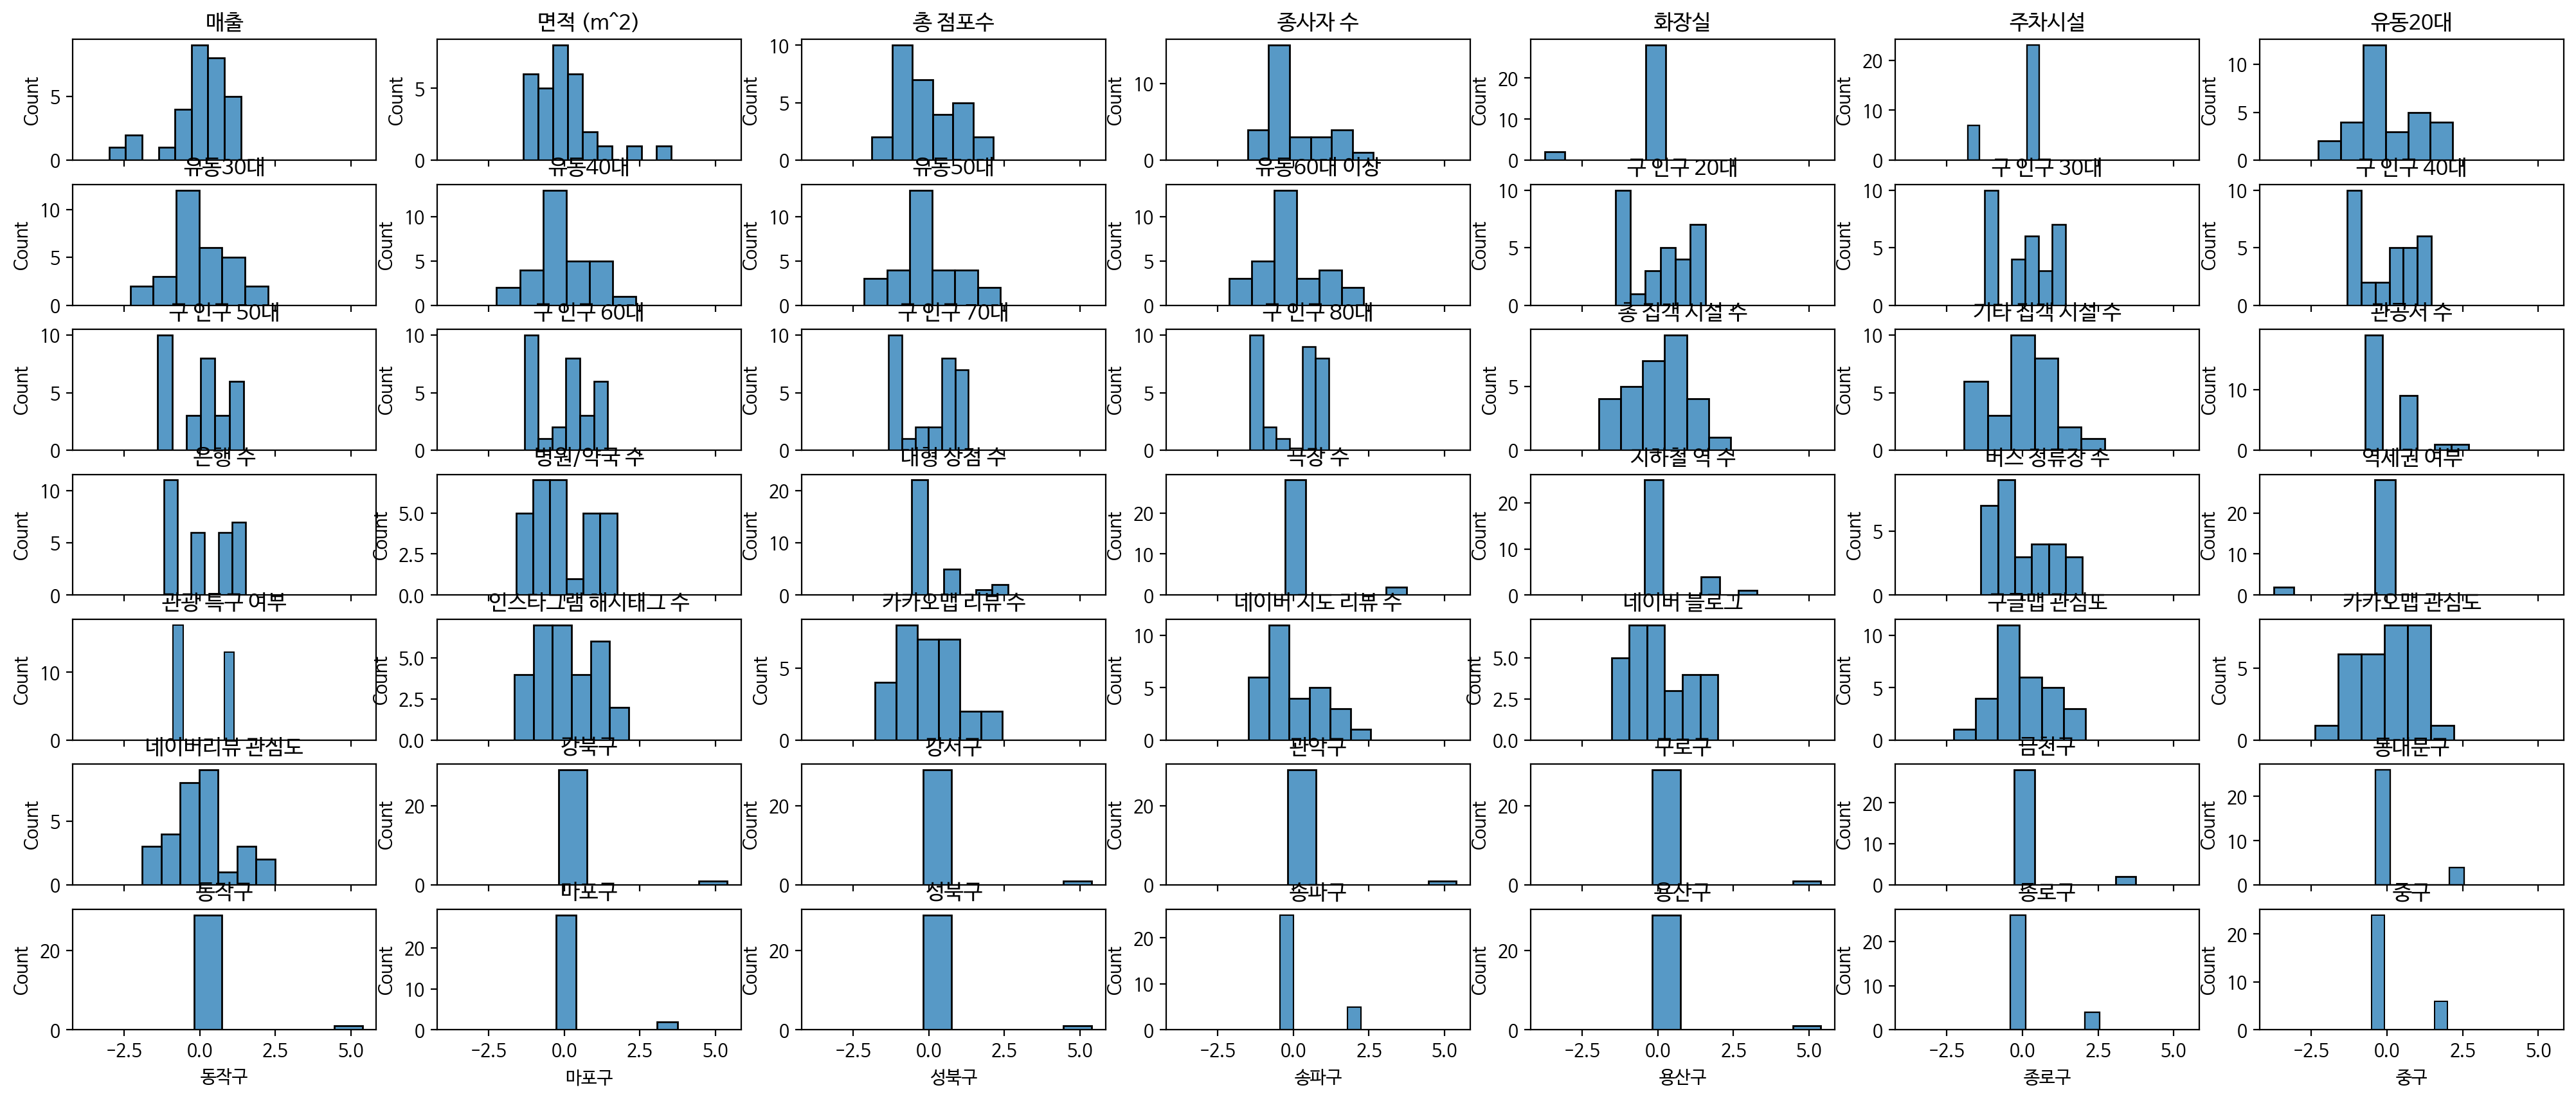

In [ ]:
fig, axes = plt.subplots(7, 7, sharex=True, figsize=(25,10))

x = 0
for i, col in enumerate(dff_log_scale):
    sns.histplot(dff_log_scale[col], ax = axes[x,i%7])
    axes[x, i%7].set_title(col)
    if (i+1)%7 == 0: x += 1

# Factor Analyzis

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 34.1 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=006d4e2c1e346c6f7ec246f900d23847164c129053f17846cbd977966c8f61e0
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 4.0.0
    Uninstalling platformdirs-4.0.0:
      Successfully u

## Bartlett's Test
- 해당 데이터셋이 factor analysis하기에 적합한지 검정
- 귀무가설: correlation coefficients are all 0
- p-value가 0.05이하면 귀무가설 기각함. 즉, 변수간 correlation이 있다고 판단되는 경우 factor analysis를 사용하기에 적합하다.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

## 데이터 적절성 확인
_, p_value = calculate_bartlett_sphericity(dff_log_scale)
# _, kmo_measure = calculate_kmo(dff_log_scale)
print('Bartlett’s Test: ', p_value)
# print('Kaiser-Meyer-Olkin Test ', kmo_measure)

Bartlett’s Test:  0.0


In [ ]:
### Factor Analysis ###
## 공통 인자를 이용해 변수들의 상관 구조를 파악하며 공통 인자를 통해 해석 가능한 지표로 만들 수 있음
from factor_analyzer import FactorAnalyzer

## FA - log transformation + standardization
- 위치 더미변수(구), 구인구 전부 포함하고 log transformation과 standardization을 수행한 데이터셋으로 factor analysis를 진행한다.

In [ ]:
fa = FactorAnalyzer(method = 'principal', n_factors = 14, rotation = 'varimax')
dff_fa = fa.fit(dff_log_scale)
print(pd.DataFrame(dff_fa.loadings_, index = dff_log_scale.columns))

                    0         1         2         3         4         5   \
매출            0.131086  0.359171  0.031614 -0.771242  0.068354  0.168628   
면적 (m^2)      0.843063  0.158216  0.122482 -0.069946  0.162341 -0.011587   
총 점포수         0.507921 -0.416590  0.162256  0.247136 -0.010083 -0.574467   
종사자 수         0.606469 -0.340218  0.155257  0.347340  0.026829 -0.350496   
화장실           0.311484  0.351822  0.110195  0.138418  0.081637 -0.134235   
주차시설          0.240100  0.620185  0.019779  0.255944  0.293633  0.017259   
유동20대         0.961102 -0.017282  0.151737 -0.021313 -0.130643  0.075697   
유동30대         0.959088 -0.032899  0.134418 -0.035463 -0.144024  0.042549   
유동40대         0.972803  0.003843  0.124209 -0.020111 -0.115396  0.030550   
유동50대         0.975650 -0.009707  0.124652 -0.015168 -0.087274  0.018040   
유동60대 이상      0.972914 -0.010982  0.128015 -0.009910 -0.070619 -0.005134   
구 인구 20대     -0.017074  0.968964 -0.091721 -0.067045 -0.069549  0.095957   
구 인구 30대    

In [ ]:
print(pd.DataFrame(dff_fa.get_communalities(), index = dff_log_scale.columns))

                     0
매출            0.847641
면적 (m^2)      0.894567
총 점포수         0.943846
종사자 수         0.857470
화장실           0.862055
주차시설          0.781819
유동20대         0.982603
유동30대         0.977448
유동40대         0.984201
유동50대         0.982034
유동60대 이상      0.977995
구 인구 20대      0.989056
구 인구 30대      0.993533
구 인구 40대      0.996721
구 인구 50대      0.996986
구 인구 60대      0.995567
구 인구 70대      0.996734
구 인구 80대      0.990634
총 집객 시설 수     0.956338
기타 집객 시설 수    0.929220
관공서 수         0.922812
은행 수          0.903145
병원/약국 수       0.840564
대형 상점 수       0.855635
극장 수          0.883976
지하철 역 수       0.767002
버스 정류장 수      0.877971
역세권 여부        0.817738
관광 특구 여부      0.799718
인스타그램 해시태그 수  0.892043
카카오맵 리뷰 수     0.954941
네이버 지도 리뷰 수   0.923937
네이버 블로그       0.952646
구글맵 관심도       0.876829
카카오맵 관심도      0.852203
네이버리뷰 관심도     0.922114
강북구           0.818087
강서구           0.935119
관악구           0.593902
구로구           0.941903
금천구           0.710698
동대문구          0.950273
동작구        

In [ ]:
ev, v = dff_fa.get_eigenvalues()
print(pd.DataFrame(ev))

               0
0   1.135513e+01
1   9.657775e+00
2   4.748602e+00
3   2.667110e+00
4   2.153581e+00
5   1.950442e+00
6   1.854630e+00
7   1.712990e+00
8   1.592190e+00
9   1.465378e+00
10  1.323391e+00
11  1.203541e+00
12  1.183410e+00
13  1.163377e+00
14  8.783352e-01
15  8.043402e-01
16  7.147021e-01
17  6.096366e-01
18  4.835714e-01
19  3.648313e-01
20  3.501478e-01
21  2.081395e-01
22  1.897046e-01
23  1.459601e-01
24  9.491763e-02
25  6.969465e-02
26  2.922445e-02
27  1.657707e-02
28  8.668807e-03
29  1.775385e-15
30  1.633906e-15
31  1.373286e-15
32  1.001842e-15
33  8.059123e-16
34  5.016711e-16
35  4.429415e-16
36  3.527758e-16
37  1.953786e-16
38  1.409750e-16
39  7.760865e-17
40  2.847235e-17
41 -1.497483e-16
42 -2.149175e-16
43 -3.559606e-16
44 -5.417644e-16
45 -6.829853e-16
46 -7.851305e-16
47 -1.185358e-15
48 -2.334393e-15


In [ ]:
# 가중치 = 각 변수의 communality/추출된 요인들의 eigenvalue의 합
### 다변량 자료를 요인분석하여 eigenvalue가 1이상인 요인들만 추려냄

sum_ev = sum(ev[ev>=1])
dff_fa.get_communalities()/sum(ev)

array([0.01729879, 0.01825646, 0.01926217, 0.01749939, 0.01759296,
       0.0159555 , 0.02005313, 0.01994791, 0.02008573, 0.02004151,
       0.01995907, 0.02018482, 0.02027619, 0.02034125, 0.02034665,
       0.02031769, 0.02034152, 0.02021701, 0.0195171 , 0.01896368,
       0.01883289, 0.01843153, 0.01715437, 0.01746194, 0.01804033,
       0.01565311, 0.01791778, 0.01668853, 0.01632077, 0.01820496,
       0.0194886 , 0.01885586, 0.01944175, 0.01789448, 0.01739189,
       0.01881865, 0.01669565, 0.01908406, 0.01212044, 0.01922252,
       0.01450404, 0.01939332, 0.016993  , 0.01651734, 0.01814243,
       0.01858862, 0.01700727, 0.01789553, 0.01938286])

## FA - log transformation + standardization without dummy variables
- 위치 더미변수(구)를 제외, 구인구는 전부 포함하고 log transformation과 standardization을 수행한 데이터셋으로 factor analysis를 진행한다.

In [ ]:
# 더미변수 삭제 후 다시 진행해보기
dfff = dff_log_scale.iloc[:,:36]

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

## 데이터 적절성 확인
_, p_value = calculate_bartlett_sphericity(dfff)
# _, kmo_measure = calculate_kmo(dff_log_scale)
print('Bartlett’s Test: ', p_value)
# print('Kaiser-Meyer-Olkin Test ', kmo_measure)

Bartlett’s Test:  0.0


In [ ]:
fa = FactorAnalyzer(method = 'principal', n_factors = 7, rotation = 'varimax')
dfff_fa = fa.fit(dfff)
print(pd.DataFrame(dfff_fa.loadings_, index = dfff.columns))

                     0         1         2         3         4         5  \
매출            0.093496  0.344191  0.042263  0.783588  0.160657 -0.063733   
면적 (m^2)      0.760436  0.109300  0.134820  0.172823  0.196125  0.168269   
총 점포수         0.530888 -0.476563  0.141334 -0.214803 -0.193662  0.444507   
종사자 수         0.565456 -0.403187  0.138829 -0.253330 -0.088531  0.351474   
화장실           0.320620  0.423731  0.096607 -0.268088 -0.563245 -0.342443   
주차시설          0.165321  0.648805  0.039329 -0.309381 -0.112808  0.035904   
유동20대         0.961210  0.007859  0.141778  0.016128  0.023680 -0.056193   
유동30대         0.969794 -0.008953  0.122088  0.018872  0.004868 -0.058436   
유동40대         0.969060  0.018409  0.113393  0.016196  0.013704 -0.040542   
유동50대         0.970914  0.003784  0.111598  0.009694  0.011353 -0.027562   
유동60대 이상      0.970274  0.000569  0.114936  0.003921  0.012471  0.003573   
구 인구 20대     -0.019055  0.973674 -0.086098  0.092576  0.030640  0.001554   
구 인구 30대    

In [ ]:
print(pd.DataFrame(dfff_fa.get_communalities(), index = dfff.columns))

                     0
매출            0.774696
면적 (m^2)      0.873914
총 점포수         0.819753
종사자 수         0.769188
화장실           0.820545
주차시설          0.605952
유동20대         0.966146
유동30대         0.970542
유동40대         0.978376
유동50대         0.983366
유동60대 이상      0.981177
구 인구 20대      0.965471
구 인구 30대      0.967182
구 인구 40대      0.973938
구 인구 50대      0.978108
구 인구 60대      0.979981
구 인구 70대      0.979432
구 인구 80대      0.959780
총 집객 시설 수     0.959656
기타 집객 시설 수    0.932169
관공서 수         0.751615
은행 수          0.700567
병원/약국 수       0.693518
대형 상점 수       0.813244
극장 수          0.897582
지하철 역 수       0.434997
버스 정류장 수      0.698438
역세권 여부        0.680195
관광 특구 여부      0.612587
인스타그램 해시태그 수  0.847267
카카오맵 리뷰 수     0.908906
네이버 지도 리뷰 수   0.865339
네이버 블로그       0.911518
구글맵 관심도       0.838518
카카오맵 관심도      0.792249
네이버리뷰 관심도     0.825510


In [ ]:
ev, v = dfff_fa.get_eigenvalues()
print(pd.DataFrame(ev))

               0
0   1.079001e+01
1   8.807119e+00
2   4.131258e+00
3   2.298062e+00
4   1.660751e+00
5   1.445601e+00
6   1.378617e+00
7   9.535299e-01
8   8.450793e-01
9   6.465567e-01
10  6.382341e-01
11  5.168179e-01
12  3.753490e-01
13  3.495437e-01
14  2.995248e-01
15  2.358275e-01
16  1.758697e-01
17  1.250169e-01
18  9.289347e-02
19  6.753019e-02
20  6.166574e-02
21  4.185465e-02
22  2.997208e-02
23  1.360296e-02
24  8.739016e-03
25  6.504590e-03
26  3.536055e-03
27  7.485261e-04
28  1.815179e-04
29  1.746798e-15
30  1.038330e-15
31  7.810902e-16
32 -1.622768e-16
33 -3.430438e-16
34 -1.188429e-15
35 -1.713701e-15


In [ ]:
# 가중치 = 각 변수의 communality/추출된 요인들의 eigenvalue의 합
### 다변량 자료를 요인분석하여 eigenvalue가 1이상인 요인들만 추려냄

sum_ev = sum(ev[ev>=1])
w = dfff_fa.get_communalities()/sum(ev)

In [ ]:
pd.DataFrame({'시장':market, '값':np.sum(dfff*w, axis = 1)}).sort_values('값', ascending = False)

시장         값
9        가락시장  1.117796
11    노량진수산시장  0.756179
12     서울약령시장  0.520075
0        광장시장  0.500522
4       남대문시장  0.362507
1     동대문종합시장  0.264814
22       방이시장  0.255500
7        경동시장  0.229337
23      까치산시장  0.217038
26    새마을전통시장  0.133885
6        방산시장  0.069239
10       풍물시장  0.053419
8        망원시장  0.046641
25       정릉시장  0.030665
21     마천중앙시장  0.018026
20    풍납도깨비시장  0.008851
17      남구로시장 -0.039490
14       대명시장 -0.055307
18     용산용문시장 -0.088302
24       신원시장 -0.128783
5        평화시장 -0.236075
15     서울중앙시장 -0.241928
13  중부(건어물)시장 -0.277455
16    청량리종합시장 -0.310347
29       수유시장 -0.324688
19       아현시장 -0.457612
2        통인시장 -0.492734
27     별빛남문시장 -0.507775
3        동묘시장 -0.618531
28   황학동 벼룩시장 -0.805466

## FA - log transformation + standardization without dummy variables and population per district
- 위치 더미변수(구)와 연령별 구 인구수를 제외하고 log transformation과 standardization을 수행한 데이터셋으로 factor analysis를 진행한다.

In [ ]:
dfff_nopop = dfff.loc[:,['매출', '면적 (m^2)', '총 점포수', '종사자 수', '화장실', '주차시설', '유동20대', '유동30대',
       '유동40대', '유동50대', '유동60대 이상', '총 집객 시설 수',
       '기타 집객 시설 수', '관공서 수', '은행 수', '병원/약국 수', '대형 상점 수', '극장 수', '지하철 역 수',
       '버스 정류장 수', '역세권 여부', '관광 특구 여부', '인스타그램 해시태그 수', '카카오맵 리뷰 수',
       '네이버 지도 리뷰 수', '네이버 블로그', '구글맵 관심도', '카카오맵 관심도', '네이버리뷰 관심도']]

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

## 데이터 적절성 확인
_, p_value = calculate_bartlett_sphericity(dfff_nopop)
# _, kmo_measure = calculate_kmo(dff_log_scale)
print('Bartlett’s Test: ', p_value)
# print('Kaiser-Meyer-Olkin Test ', kmo_measure)

Bartlett’s Test:  1.8544499697284238e-85


In [ ]:
fa = FactorAnalyzer(method = 'principal', n_factors = 7, rotation = 'varimax')
dfff_nopop_fa = fa.fit(dfff_nopop)
print(pd.DataFrame(dfff_nopop_fa.loadings_, index = dfff_nopop.columns))

                     0         1         2         3         4         5  \
매출            0.100407  0.017206 -0.882591  0.003513 -0.168445  0.018239   
면적 (m^2)      0.725422  0.135079 -0.142386 -0.130961 -0.089405  0.078299   
총 점포수         0.543673  0.186934  0.448050 -0.374012  0.419882  0.187121   
종사자 수         0.563574  0.180723  0.439802 -0.270751  0.264486  0.167294   
화장실           0.250620  0.035004  0.052258  0.812647  0.267577 -0.133823   
주차시설          0.098516 -0.027774  0.004816  0.674040 -0.146114  0.321581   
유동20대         0.943674  0.153727 -0.020601  0.119219 -0.038662 -0.034100   
유동30대         0.955553  0.135783 -0.017744  0.116692 -0.019639 -0.039057   
유동40대         0.949292  0.123819 -0.016609  0.111074 -0.022353 -0.030083   
유동50대         0.952244  0.123174 -0.004036  0.100387 -0.014160 -0.022020   
유동60대 이상      0.952072  0.126451  0.007830  0.077683 -0.003401 -0.003800   
총 집객 시설 수     0.476423 -0.028310  0.021370  0.081307  0.013727  0.020772   
기타 집객 시설 수  

In [ ]:
print(pd.DataFrame(dfff_nopop_fa.get_communalities(), index = dfff_nopop.columns))

                     0
매출            0.830086
면적 (m^2)      0.865689
총 점포수         0.891326
종사자 수         0.785821
화장실           0.843776
주차시설          0.676703
유동20대         0.972859
유동30대         0.976782
유동40대         0.982067
유동50대         0.987637
유동60대 이상      0.983629
총 집객 시설 수     0.948329
기타 집객 시설 수    0.922308
관공서 수         0.750715
은행 수          0.771522
병원/약국 수       0.704187
대형 상점 수       0.821060
극장 수          0.895775
지하철 역 수       0.389460
버스 정류장 수      0.691766
역세권 여부        0.778808
관광 특구 여부      0.684533
인스타그램 해시태그 수  0.863125
카카오맵 리뷰 수     0.904954
네이버 지도 리뷰 수   0.867751
네이버 블로그       0.914109
구글맵 관심도       0.841501
카카오맵 관심도      0.795577
네이버리뷰 관심도     0.830679


In [ ]:
ev, v = dfff_nopop_fa.get_eigenvalues()
print(pd.DataFrame(ev))

            0
0   10.404399
1    4.865684
2    2.660445
3    2.006328
4    1.569291
5    1.416425
6    1.249961
7    0.902687
8    0.676428
9    0.641562
10   0.564577
11   0.484822
12   0.370698
13   0.311984
14   0.234238
15   0.175395
16   0.118595
17   0.107200
18   0.079779
19   0.061416
20   0.043132
21   0.030521
22   0.011942
23   0.007361
24   0.003652
25   0.000710
26   0.000543
27   0.000216
28   0.000009


In [ ]:
# 가중치 = 각 변수의 communality/추출된 요인들의 eigenvalue의 합
### 다변량 자료를 요인분석하여 eigenvalue가 1이상인 요인들만 추려냄

sum_ev = sum(ev[ev>=1])
w = dfff_nopop_fa.get_communalities()/sum(ev)

In [ ]:
pd.DataFrame({'변수':dfff_nopop.columns, '가중치': w}).sort_values('가중치', ascending = False)

변수       가중치
0             매출  0.028624
1       면적 (m^2)  0.029851
2          총 점포수  0.030735
3          종사자 수  0.027097
4            화장실  0.029096
5           주차시설  0.023335
6          유동20대  0.033547
7          유동30대  0.033682
8          유동40대  0.033864
9          유동50대  0.034056
10      유동60대 이상  0.033918
11     총 집객 시설 수  0.032701
12    기타 집객 시설 수  0.031804
13         관공서 수  0.025887
14          은행 수  0.026604
15       병원/약국 수  0.024282
16       대형 상점 수  0.028312
17          극장 수  0.030889
18       지하철 역 수  0.013430
19      버스 정류장 수  0.023854
20        역세권 여부  0.026855
21      관광 특구 여부  0.023605
22  인스타그램 해시태그 수  0.029763
23     카카오맵 리뷰 수  0.031205
24   네이버 지도 리뷰 수  0.029922
25       네이버 블로그  0.031521
26       구글맵 관심도  0.029017
27      카카오맵 관심도  0.027434
28     네이버리뷰 관심도  0.028644

(0.03, 0.035)

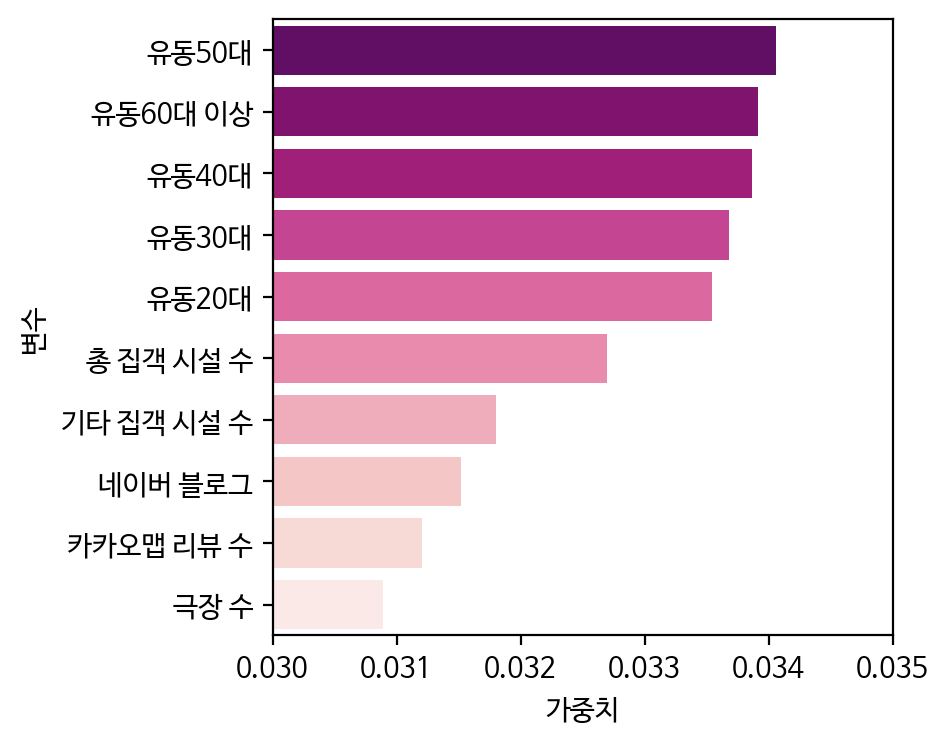

In [ ]:
w_top10 = pd.DataFrame({'변수':dfff_nopop.columns, '가중치': w}).sort_values('가중치', ascending = False).head(10)

plt.rcParams['font.family'] = 'NanumBarunGothic'

f, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x='가중치', y='변수', data= w_top10, orient = 'h', palette = "RdPu_r")
ax.set_xlim(0.030, 0.035)

In [ ]:
pd.DataFrame({'시장':market, '값':np.sum(dfff_nopop*w, axis = 1)}).sort_values('값', ascending = False)

시장         값
9        가락시장  1.083652
0        광장시장  0.877833
11    노량진수산시장  0.813744
4       남대문시장  0.768039
1     동대문종합시장  0.598748
12     서울약령시장  0.563826
6        방산시장  0.408553
7        경동시장  0.202878
5        평화시장  0.023554
15     서울중앙시장  0.016563
22       방이시장  0.005376
14       대명시장 -0.005478
23      까치산시장 -0.010797
10       풍물시장 -0.015490
18     용산용문시장 -0.022013
13  중부(건어물)시장 -0.027285
8        망원시장 -0.036483
26    새마을전통시장 -0.140986
25       정릉시장 -0.142019
17      남구로시장 -0.192985
21     마천중앙시장 -0.294832
20    풍납도깨비시장 -0.306389
2        통인시장 -0.372199
24       신원시장 -0.393912
29       수유시장 -0.463916
16    청량리종합시장 -0.480590
3        동묘시장 -0.521679
27     별빛남문시장 -0.563889
19       아현시장 -0.678433
28   황학동 벼룩시장 -0.693392